#  neural_network

In [1]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input

import numpy as np
import matplotlib.pyplot as plt
import random
from datetime import datetime

import os
import sys
sys.path.append(os.path.abspath('..'))
from rnn_class.util import get_wikipedia_data
from rnn_class.brown import get_sentences_with_word2idx_limit_vocab, get_sentences_with_word2idx

from markov import get_bigram_probs

In [3]:
if __name__ == '__main__':
  # load in the data
  # note: sentences are already converted to sequences of word indexes
  # note: you can limit the vocab size if you run out of memory
  sentences, word2idx = get_sentences_with_word2idx_limit_vocab(2000)
  # sentences, word2idx = get_sentences_with_word2idx()

  # vocab size
  V = len(word2idx)
  print("Vocab size:", V)

  # we will also treat beginning of sentence and end of sentence as bigrams
  # START -> first word
  # last word -> END
  start_idx = word2idx['START']
  end_idx = word2idx['END']


  # a matrix where:
  # row = last word
  # col = current word
  # value at [row, col] = p(current word | last word)
  bigram_probs = get_bigram_probs(sentences, V, start_idx, end_idx, smoothing=0.1)


  # train a shallow neural network model
  D = 100
  W1 = np.random.randn(V, D) / np.sqrt(V)
  W2 = np.random.randn(D, V) / np.sqrt(D)

  losses = []
  epochs = 1
  lr = 1e-2
  
  def softmax(a):
    a = a - a.max()
    exp_a = np.exp(a)
    return exp_a / exp_a.sum(axis=1, keepdims=True)

  # what is the loss if we set W = log(bigram_probs)?
  W_bigram = np.log(bigram_probs)
  bigram_losses = []

  t0 = datetime.now()
  for epoch in range(epochs):
    # shuffle sentences at each epoch
    random.shuffle(sentences)

    j = 0 # keep track of iterations
    for sentence in sentences:
      # convert sentence into one-hot encoded inputs and targets
      sentence = [start_idx] + sentence + [end_idx]
      n = len(sentence)
      inputs = np.zeros((n - 1, V))
      targets = np.zeros((n - 1, V))
      inputs[np.arange(n - 1), sentence[:n-1]] = 1
      targets[np.arange(n - 1), sentence[1:]] = 1

      # get output predictions
      hidden = np.tanh(inputs.dot(W1))
      predictions = softmax(hidden.dot(W2))

      # do a gradient descent step
      W2 = W2 - lr * hidden.T.dot(predictions - targets)
      dhidden = (predictions - targets).dot(W2.T) * (1 - hidden * hidden)
      W1 = W1 - lr * inputs.T.dot(dhidden)

      # keep track of the loss
      loss = -np.sum(targets * np.log(predictions)) / (n - 1)
      losses.append(loss)

      # keep track of the bigram loss
      # only do it for the first epoch to avoid redundancy
      if epoch == 0:
        bigram_predictions = softmax(inputs.dot(W_bigram))
        bigram_loss = -np.sum(targets * np.log(bigram_predictions)) / (n - 1)
        bigram_losses.append(bigram_loss)


      if j % 10 == 0:
        print("epoch:", epoch, "sentence: %s/%s" % (j, len(sentences)), "loss:", loss)
      j += 1

START inf
END inf
man inf
paris inf
britain inf
england inf
king inf
woman inf
rome inf
london inf
queen inf
italy inf
france inf
the 69971
, 58334
. 49346
of 36412
and 28853
to 26158
a 23195
in 21337
that 10594
is 10109
was 9815
he 9548
for 9489
`` 8837
'' 8789
it 8760
with 7289
as 7253
his 6996
on 6741
be 6377
; 5566
at 5372
by 5306
i 5164
this 5145
had 5133
? 4693
not 4610
are 4394
but 4381
from 4370
or 4206
have 3942
an 3740
they 3620
which 3561
-- 3432
one 3292
you 3286
were 3284
her 3036
all 3001
she 2860
there 2728
would 2714
their 2669
we 2652
him 2619
been 2472
) 2466
has 2437
( 2435
when 2331
who 2252
will 2245
more 2215
if 2198
no 2139
out 2097
so 1985
said 1961
what 1908
up 1890
its 1858
about 1815
: 1795
into 1791
than 1790
them 1788
can 1772
only 1748
other 1702
new 1635
some 1618
could 1601
time 1598
! 1596
these 1573
two 1412
may 1402
then 1380
do 1363
first 1361
any 1344
my 1318
now 1314
such 1303
like 1292
our 1252
over 1236
me 1181
even 1170
most 1159
made 1125
also 

blood 121
additional 120
j. 120
technical 120
fiscal 120
radio 120
described 120
stop 120
progress 120
steps 119
test 119
chief 119
reported 119
served 119
based 119
main 119
determined 119
image 119
decision 119
window 119
religion 119
aj 118
gun 118
responsibility 118
middle 118
europe 118
british 118
character 118
learned 117
horse 117
writing 117
appear 117
s. 117
account 117
ones 116
serious 116
activity 116
types 116
green 116
length 116
lived 115
audience 115
letters 115
returned 115
obtained 115
nuclear 115
specific 115
corner 115
forward 115
activities 115
slowly 115
doubt 114
6 114
justice 114
moving 114
latter 114
gives 114
straight 114
hit 114
plane 114
quality 114
design 114
obviously 114
operation 113
plans 113
shot 113
seven 113
a. 113
choice 113
poor 113
staff 113
function 113
figures 113
parts 113
stay 113
saying 113
include 113
15 113
born 113
pattern 113
30 112
cars 112
whatever 112
sun 112
faith 111
pool 111
hospital 110
corps 110
wish 110
lack 110
completely 110
he

achieved 62
assignment 62
baby 62
guests 62
greatly 62
recognize 62
wilson 62
library 62
careful 62
pleasure 62
cool 62
extreme 62
concerning 62
governments 61
procedures 61
prices 61
duty 61
courses 61
friendly 61
we're 61
r. 61
coast 61
acting 61
50 61
closer 61
speech 61
european 61
showing 61
boston 61
victory 61
beach 61
minister 61
commercial 61
metal 61
possibly 61
tests 61
soft 61
kid 61
vast 61
continuing 61
associated 61
shoulder 61
weapons 61
shore 61
greek 61
travel 61
imagine 61
feelings 61
organizations 61
ideal 61
eat 61
friday 60
keeping 60
heavily 60
armed 60
ended 60
learning 60
text 60
existing 60
scale 60
setting 60
goal 60
task 60
contract 60
garden 60
nose 60
refused 60
streets 60
orchestra 60
contained 60
machinery 60
chemical 60
onto 60
circle 60
slow 60
maintain 60
fat 60
somewhere 60
technique 60
stared 60
moon 60
notice 59
drop 59
budget 59
providing 59
f. 59
formula 59
housing 59
tension 59
advance 59
repeated 59
parties 59
uses 59
judgment 59
taste 59
novel

epoch: 0 sentence: 1140/57013 loss: 4.430415155734222
epoch: 0 sentence: 1150/57013 loss: 6.643616091481868
epoch: 0 sentence: 1160/57013 loss: 4.986092436754545
epoch: 0 sentence: 1170/57013 loss: 6.104827722579571
epoch: 0 sentence: 1180/57013 loss: 6.126600326505814
epoch: 0 sentence: 1190/57013 loss: 5.805665443290269
epoch: 0 sentence: 1200/57013 loss: 4.709562647982995
epoch: 0 sentence: 1210/57013 loss: 5.977370634712991
epoch: 0 sentence: 1220/57013 loss: 6.234512451808814
epoch: 0 sentence: 1230/57013 loss: 5.324436369050009
epoch: 0 sentence: 1240/57013 loss: 5.191062669084471
epoch: 0 sentence: 1250/57013 loss: 5.749230954188803
epoch: 0 sentence: 1260/57013 loss: 6.0580743178397105
epoch: 0 sentence: 1270/57013 loss: 5.994989889969031
epoch: 0 sentence: 1280/57013 loss: 6.707986965982469
epoch: 0 sentence: 1290/57013 loss: 4.970960965445441
epoch: 0 sentence: 1300/57013 loss: 6.661724325502691
epoch: 0 sentence: 1310/57013 loss: 5.3744031031893
epoch: 0 sentence: 1320/57013

epoch: 0 sentence: 2670/57013 loss: 4.031032575388105
epoch: 0 sentence: 2680/57013 loss: 4.827655107704122
epoch: 0 sentence: 2690/57013 loss: 4.142522365322531
epoch: 0 sentence: 2700/57013 loss: 5.7704502451274475
epoch: 0 sentence: 2710/57013 loss: 4.5887383391311
epoch: 0 sentence: 2720/57013 loss: 4.8830192046861365
epoch: 0 sentence: 2730/57013 loss: 4.110119904869402
epoch: 0 sentence: 2740/57013 loss: 5.197634888138109
epoch: 0 sentence: 2750/57013 loss: 3.4072692482007807
epoch: 0 sentence: 2760/57013 loss: 5.704672235904963
epoch: 0 sentence: 2770/57013 loss: 5.0462139090188405
epoch: 0 sentence: 2780/57013 loss: 6.015655345593578
epoch: 0 sentence: 2790/57013 loss: 5.769737921387183
epoch: 0 sentence: 2800/57013 loss: 5.80443555961117
epoch: 0 sentence: 2810/57013 loss: 5.7595337195606575
epoch: 0 sentence: 2820/57013 loss: 5.0699765288490735
epoch: 0 sentence: 2830/57013 loss: 5.357233411931432
epoch: 0 sentence: 2840/57013 loss: 4.41254844807563
epoch: 0 sentence: 2850/57

epoch: 0 sentence: 4190/57013 loss: 5.777034456020305
epoch: 0 sentence: 4200/57013 loss: 1.7000660976126447
epoch: 0 sentence: 4210/57013 loss: 4.322147007011057
epoch: 0 sentence: 4220/57013 loss: 6.035302931301782
epoch: 0 sentence: 4230/57013 loss: 4.314216182987394
epoch: 0 sentence: 4240/57013 loss: 4.6711663297445885
epoch: 0 sentence: 4250/57013 loss: 3.9077815761265704
epoch: 0 sentence: 4260/57013 loss: 5.890666517504408
epoch: 0 sentence: 4270/57013 loss: 3.989522248878323
epoch: 0 sentence: 4280/57013 loss: 5.75474218318126
epoch: 0 sentence: 4290/57013 loss: 5.725577053890278
epoch: 0 sentence: 4300/57013 loss: 2.9902215582257345
epoch: 0 sentence: 4310/57013 loss: 4.2797864535627035
epoch: 0 sentence: 4320/57013 loss: 6.13677215528946
epoch: 0 sentence: 4330/57013 loss: 2.826063059931136
epoch: 0 sentence: 4340/57013 loss: 5.620357241418467
epoch: 0 sentence: 4350/57013 loss: 4.93380822585751
epoch: 0 sentence: 4360/57013 loss: 4.269946557042576
epoch: 0 sentence: 4370/57

epoch: 0 sentence: 5710/57013 loss: 5.898615519650289
epoch: 0 sentence: 5720/57013 loss: 4.421177573924706
epoch: 0 sentence: 5730/57013 loss: 3.830760383277324
epoch: 0 sentence: 5740/57013 loss: 4.698003945362356
epoch: 0 sentence: 5750/57013 loss: 3.719106017646941
epoch: 0 sentence: 5760/57013 loss: 4.447748636625042
epoch: 0 sentence: 5770/57013 loss: 4.97692929156235
epoch: 0 sentence: 5780/57013 loss: 4.925288202054018
epoch: 0 sentence: 5790/57013 loss: 4.978023099885599
epoch: 0 sentence: 5800/57013 loss: 1.336467494375035
epoch: 0 sentence: 5810/57013 loss: 4.155910007517123
epoch: 0 sentence: 5820/57013 loss: 5.859508869315163
epoch: 0 sentence: 5830/57013 loss: 4.041403171680901
epoch: 0 sentence: 5840/57013 loss: 3.5276222315926056
epoch: 0 sentence: 5850/57013 loss: 5.667053753040075
epoch: 0 sentence: 5860/57013 loss: 4.625655953730043
epoch: 0 sentence: 5870/57013 loss: 5.148729954092347
epoch: 0 sentence: 5880/57013 loss: 5.591547089897075
epoch: 0 sentence: 5890/5701

epoch: 0 sentence: 7230/57013 loss: 5.228097994657939
epoch: 0 sentence: 7240/57013 loss: 4.685673342682614
epoch: 0 sentence: 7250/57013 loss: 4.6190114424918205
epoch: 0 sentence: 7260/57013 loss: 3.6013970698338094
epoch: 0 sentence: 7270/57013 loss: 2.3891520738140826
epoch: 0 sentence: 7280/57013 loss: 2.6298388529328696
epoch: 0 sentence: 7290/57013 loss: 4.945486149883668
epoch: 0 sentence: 7300/57013 loss: 4.952191592225483
epoch: 0 sentence: 7310/57013 loss: 4.32438625993229
epoch: 0 sentence: 7320/57013 loss: 3.185526368254261
epoch: 0 sentence: 7330/57013 loss: 4.7330517597649635
epoch: 0 sentence: 7340/57013 loss: 4.329397106780576
epoch: 0 sentence: 7350/57013 loss: 3.3018850121111107
epoch: 0 sentence: 7360/57013 loss: 4.773167213534799
epoch: 0 sentence: 7370/57013 loss: 2.5373832162383225
epoch: 0 sentence: 7380/57013 loss: 4.408808294541995
epoch: 0 sentence: 7390/57013 loss: 5.366861691909717
epoch: 0 sentence: 7400/57013 loss: 5.710829010186821
epoch: 0 sentence: 741

epoch: 0 sentence: 8760/57013 loss: 4.642404980510968
epoch: 0 sentence: 8770/57013 loss: 5.162609682153788
epoch: 0 sentence: 8780/57013 loss: 4.70642299126814
epoch: 0 sentence: 8790/57013 loss: 6.190257815156634
epoch: 0 sentence: 8800/57013 loss: 6.260729132241655
epoch: 0 sentence: 8810/57013 loss: 3.780957421762024
epoch: 0 sentence: 8820/57013 loss: 4.017991039695776
epoch: 0 sentence: 8830/57013 loss: 5.1387577271958005
epoch: 0 sentence: 8840/57013 loss: 2.9141319191499586
epoch: 0 sentence: 8850/57013 loss: 4.114515653420527
epoch: 0 sentence: 8860/57013 loss: 4.301115732745058
epoch: 0 sentence: 8870/57013 loss: 4.064678459512336
epoch: 0 sentence: 8880/57013 loss: 4.294046070746654
epoch: 0 sentence: 8890/57013 loss: 5.280043551438181
epoch: 0 sentence: 8900/57013 loss: 4.206329388875568
epoch: 0 sentence: 8910/57013 loss: 5.967924896113333
epoch: 0 sentence: 8920/57013 loss: 5.544058946995035
epoch: 0 sentence: 8930/57013 loss: 4.820045876983398
epoch: 0 sentence: 8940/570

epoch: 0 sentence: 10280/57013 loss: 4.311875255262783
epoch: 0 sentence: 10290/57013 loss: 5.231414501839484
epoch: 0 sentence: 10300/57013 loss: 4.1368718435792085
epoch: 0 sentence: 10310/57013 loss: 4.254018391548443
epoch: 0 sentence: 10320/57013 loss: 4.3590664675400586
epoch: 0 sentence: 10330/57013 loss: 2.9162123319520212
epoch: 0 sentence: 10340/57013 loss: 4.002313285331967
epoch: 0 sentence: 10350/57013 loss: 3.1912007198474255
epoch: 0 sentence: 10360/57013 loss: 3.801059363312582
epoch: 0 sentence: 10370/57013 loss: 4.65500174073633
epoch: 0 sentence: 10380/57013 loss: 3.3194677536836417
epoch: 0 sentence: 10390/57013 loss: 3.9465214568243896
epoch: 0 sentence: 10400/57013 loss: 4.013447270836446
epoch: 0 sentence: 10410/57013 loss: 5.763466772672942
epoch: 0 sentence: 10420/57013 loss: 4.31702337732616
epoch: 0 sentence: 10430/57013 loss: 3.9973901677704333
epoch: 0 sentence: 10440/57013 loss: 3.7357375149338186
epoch: 0 sentence: 10450/57013 loss: 4.238620045457609
epoc

epoch: 0 sentence: 11770/57013 loss: 4.353249943825373
epoch: 0 sentence: 11780/57013 loss: 3.597456136110326
epoch: 0 sentence: 11790/57013 loss: 5.9754594923570306
epoch: 0 sentence: 11800/57013 loss: 4.105997330514474
epoch: 0 sentence: 11810/57013 loss: 4.102883986566427
epoch: 0 sentence: 11820/57013 loss: 5.3799781010219805
epoch: 0 sentence: 11830/57013 loss: 4.086689548263446
epoch: 0 sentence: 11840/57013 loss: 5.755356510460217
epoch: 0 sentence: 11850/57013 loss: 4.499501574853202
epoch: 0 sentence: 11860/57013 loss: 4.3006860776224425
epoch: 0 sentence: 11870/57013 loss: 3.6733351674460297
epoch: 0 sentence: 11880/57013 loss: 2.2076967904670863
epoch: 0 sentence: 11890/57013 loss: 4.533609399101395
epoch: 0 sentence: 11900/57013 loss: 2.3057725533678206
epoch: 0 sentence: 11910/57013 loss: 4.982793457593387
epoch: 0 sentence: 11920/57013 loss: 4.335898748603173
epoch: 0 sentence: 11930/57013 loss: 5.368077436152371
epoch: 0 sentence: 11940/57013 loss: 4.984712575716184
epoc

epoch: 0 sentence: 13270/57013 loss: 4.682305036950922
epoch: 0 sentence: 13280/57013 loss: 5.114248562131148
epoch: 0 sentence: 13290/57013 loss: 2.348742678205567
epoch: 0 sentence: 13300/57013 loss: 4.3056702921921035
epoch: 0 sentence: 13310/57013 loss: 4.384620175110173
epoch: 0 sentence: 13320/57013 loss: 3.3528412484340464
epoch: 0 sentence: 13330/57013 loss: 5.108988868440736
epoch: 0 sentence: 13340/57013 loss: 5.1217506554025345
epoch: 0 sentence: 13350/57013 loss: 3.777619469005426
epoch: 0 sentence: 13360/57013 loss: 5.080691797348796
epoch: 0 sentence: 13370/57013 loss: 2.695155250658977
epoch: 0 sentence: 13380/57013 loss: 4.507429160329432
epoch: 0 sentence: 13390/57013 loss: 5.302635833195071
epoch: 0 sentence: 13400/57013 loss: 4.124618658176461
epoch: 0 sentence: 13410/57013 loss: 3.0512413895204347
epoch: 0 sentence: 13420/57013 loss: 5.508301558011723
epoch: 0 sentence: 13430/57013 loss: 4.176418632100748
epoch: 0 sentence: 13440/57013 loss: 5.44337230602516
epoch: 

epoch: 0 sentence: 14760/57013 loss: 3.9259139516036203
epoch: 0 sentence: 14770/57013 loss: 3.48903889222609
epoch: 0 sentence: 14780/57013 loss: 3.84840121037256
epoch: 0 sentence: 14790/57013 loss: 4.288165782234001
epoch: 0 sentence: 14800/57013 loss: 5.4635004656937465
epoch: 0 sentence: 14810/57013 loss: 4.347294265384498
epoch: 0 sentence: 14820/57013 loss: 4.269021569097287
epoch: 0 sentence: 14830/57013 loss: 3.0921360595082694
epoch: 0 sentence: 14840/57013 loss: 4.635066112909605
epoch: 0 sentence: 14850/57013 loss: 3.930832723335569
epoch: 0 sentence: 14860/57013 loss: 4.313481947247385
epoch: 0 sentence: 14870/57013 loss: 5.195239563385089
epoch: 0 sentence: 14880/57013 loss: 3.8864729454323745
epoch: 0 sentence: 14890/57013 loss: 4.844082807287951
epoch: 0 sentence: 14900/57013 loss: 3.7096124899822627
epoch: 0 sentence: 14910/57013 loss: 4.896081564811827
epoch: 0 sentence: 14920/57013 loss: 4.718903444409255
epoch: 0 sentence: 14930/57013 loss: 4.046929434481305
epoch: 

epoch: 0 sentence: 16250/57013 loss: 5.112751427293961
epoch: 0 sentence: 16260/57013 loss: 3.4827076833793704
epoch: 0 sentence: 16270/57013 loss: 4.946392051509938
epoch: 0 sentence: 16280/57013 loss: 4.908861045900685
epoch: 0 sentence: 16290/57013 loss: 4.8583738283510645
epoch: 0 sentence: 16300/57013 loss: 5.392942440831437
epoch: 0 sentence: 16310/57013 loss: 4.865913240146675
epoch: 0 sentence: 16320/57013 loss: 3.164149109569929
epoch: 0 sentence: 16330/57013 loss: 3.997265568232728
epoch: 0 sentence: 16340/57013 loss: 3.5528249563287386
epoch: 0 sentence: 16350/57013 loss: 4.810290111660842
epoch: 0 sentence: 16360/57013 loss: 4.664426873299196
epoch: 0 sentence: 16370/57013 loss: 4.3504990655981395
epoch: 0 sentence: 16380/57013 loss: 5.0898555388175115
epoch: 0 sentence: 16390/57013 loss: 3.9256586358949113
epoch: 0 sentence: 16400/57013 loss: 4.113565461535647
epoch: 0 sentence: 16410/57013 loss: 4.726404386325674
epoch: 0 sentence: 16420/57013 loss: 3.6542261931363926
epo

epoch: 0 sentence: 17750/57013 loss: 3.0429068664006946
epoch: 0 sentence: 17760/57013 loss: 5.245864125758794
epoch: 0 sentence: 17770/57013 loss: 4.221227455108189
epoch: 0 sentence: 17780/57013 loss: 4.282151688777239
epoch: 0 sentence: 17790/57013 loss: 4.340528963177456
epoch: 0 sentence: 17800/57013 loss: 3.846948721080266
epoch: 0 sentence: 17810/57013 loss: 3.4667685638801102
epoch: 0 sentence: 17820/57013 loss: 4.400054508790068
epoch: 0 sentence: 17830/57013 loss: 1.526010187692428
epoch: 0 sentence: 17840/57013 loss: 3.8340114033608947
epoch: 0 sentence: 17850/57013 loss: 4.224223608686745
epoch: 0 sentence: 17860/57013 loss: 4.671941470054682
epoch: 0 sentence: 17870/57013 loss: 4.591488027277155
epoch: 0 sentence: 17880/57013 loss: 4.054986189723996
epoch: 0 sentence: 17890/57013 loss: 4.198787780234658
epoch: 0 sentence: 17900/57013 loss: 5.588914011782315
epoch: 0 sentence: 17910/57013 loss: 4.20450373007973
epoch: 0 sentence: 17920/57013 loss: 4.235295157358541
epoch: 0

epoch: 0 sentence: 19250/57013 loss: 3.702415655145153
epoch: 0 sentence: 19260/57013 loss: 3.6654264847225715
epoch: 0 sentence: 19270/57013 loss: 4.668849748792571
epoch: 0 sentence: 19280/57013 loss: 3.0161880266967955
epoch: 0 sentence: 19290/57013 loss: 4.818691116698542
epoch: 0 sentence: 19300/57013 loss: 4.4764397531525715
epoch: 0 sentence: 19310/57013 loss: 4.170978156470397
epoch: 0 sentence: 19320/57013 loss: 4.340225331669033
epoch: 0 sentence: 19330/57013 loss: 4.803117105919673
epoch: 0 sentence: 19340/57013 loss: 5.509211412322031
epoch: 0 sentence: 19350/57013 loss: 3.2979309630555576
epoch: 0 sentence: 19360/57013 loss: 3.302846552193521
epoch: 0 sentence: 19370/57013 loss: 4.046463908112741
epoch: 0 sentence: 19380/57013 loss: 3.936499875396163
epoch: 0 sentence: 19390/57013 loss: 3.93713728602067
epoch: 0 sentence: 19400/57013 loss: 3.465487436026266
epoch: 0 sentence: 19410/57013 loss: 4.074808166935055
epoch: 0 sentence: 19420/57013 loss: 3.841060762645285
epoch: 

epoch: 0 sentence: 20740/57013 loss: 4.595891985929449
epoch: 0 sentence: 20750/57013 loss: 3.8702949961111988
epoch: 0 sentence: 20760/57013 loss: 3.76794766157113
epoch: 0 sentence: 20770/57013 loss: 3.8629506105204188
epoch: 0 sentence: 20780/57013 loss: 4.527960514805499
epoch: 0 sentence: 20790/57013 loss: 3.6624321461334595
epoch: 0 sentence: 20800/57013 loss: 3.73204816191148
epoch: 0 sentence: 20810/57013 loss: 3.3872870935318784
epoch: 0 sentence: 20820/57013 loss: 4.138884768874236
epoch: 0 sentence: 20830/57013 loss: 5.000820978875126
epoch: 0 sentence: 20840/57013 loss: 4.4430167763577835
epoch: 0 sentence: 20850/57013 loss: 3.3443266063991115
epoch: 0 sentence: 20860/57013 loss: 3.8880135321167177
epoch: 0 sentence: 20870/57013 loss: 3.1987267405320887
epoch: 0 sentence: 20880/57013 loss: 5.116195668476122
epoch: 0 sentence: 20890/57013 loss: 3.4045914167053666
epoch: 0 sentence: 20900/57013 loss: 4.8744582861719
epoch: 0 sentence: 20910/57013 loss: 3.948301325588135
epoch

epoch: 0 sentence: 22240/57013 loss: 4.6377855035269455
epoch: 0 sentence: 22250/57013 loss: 4.496309045901062
epoch: 0 sentence: 22260/57013 loss: 4.746676535688801
epoch: 0 sentence: 22270/57013 loss: 3.6742731265891853
epoch: 0 sentence: 22280/57013 loss: 3.473298693560453
epoch: 0 sentence: 22290/57013 loss: 5.235681159187554
epoch: 0 sentence: 22300/57013 loss: 1.585700089684862
epoch: 0 sentence: 22310/57013 loss: 5.3913123880920475
epoch: 0 sentence: 22320/57013 loss: 4.502697920032231
epoch: 0 sentence: 22330/57013 loss: 5.058032828977251
epoch: 0 sentence: 22340/57013 loss: 1.0608214769258846
epoch: 0 sentence: 22350/57013 loss: 4.283124104958129
epoch: 0 sentence: 22360/57013 loss: 4.720594090074518
epoch: 0 sentence: 22370/57013 loss: 4.645155658779014
epoch: 0 sentence: 22380/57013 loss: 4.201263389955848
epoch: 0 sentence: 22390/57013 loss: 4.819060350149894
epoch: 0 sentence: 22400/57013 loss: 4.116030824433334
epoch: 0 sentence: 22410/57013 loss: 2.7754723634366414
epoch

epoch: 0 sentence: 23730/57013 loss: 4.366496971939502
epoch: 0 sentence: 23740/57013 loss: 3.5708744765251366
epoch: 0 sentence: 23750/57013 loss: 3.703563970815884
epoch: 0 sentence: 23760/57013 loss: 4.497793512282785
epoch: 0 sentence: 23770/57013 loss: 4.1270006796293845
epoch: 0 sentence: 23780/57013 loss: 3.8134791523402707
epoch: 0 sentence: 23790/57013 loss: 3.2855885384162358
epoch: 0 sentence: 23800/57013 loss: 3.385974249381052
epoch: 0 sentence: 23810/57013 loss: 3.5677686236158817
epoch: 0 sentence: 23820/57013 loss: 5.177070757895505
epoch: 0 sentence: 23830/57013 loss: 4.218217074835277
epoch: 0 sentence: 23840/57013 loss: 4.338496493791471
epoch: 0 sentence: 23850/57013 loss: 4.9507643315551775
epoch: 0 sentence: 23860/57013 loss: 4.135216529222564
epoch: 0 sentence: 23870/57013 loss: 5.892570294083735
epoch: 0 sentence: 23880/57013 loss: 4.401707303981445
epoch: 0 sentence: 23890/57013 loss: 4.4751428675721066
epoch: 0 sentence: 23900/57013 loss: 4.890396188930585
epo

epoch: 0 sentence: 25220/57013 loss: 5.315601873966378
epoch: 0 sentence: 25230/57013 loss: 4.347388934719357
epoch: 0 sentence: 25240/57013 loss: 5.263960251791725
epoch: 0 sentence: 25250/57013 loss: 3.22103074371557
epoch: 0 sentence: 25260/57013 loss: 4.553076789649685
epoch: 0 sentence: 25270/57013 loss: 4.443799107346681
epoch: 0 sentence: 25280/57013 loss: 4.438437420329492
epoch: 0 sentence: 25290/57013 loss: 4.107545111311998
epoch: 0 sentence: 25300/57013 loss: 4.719796319048609
epoch: 0 sentence: 25310/57013 loss: 6.185011405176385
epoch: 0 sentence: 25320/57013 loss: 5.1191074647225
epoch: 0 sentence: 25330/57013 loss: 4.29891019801544
epoch: 0 sentence: 25340/57013 loss: 4.521885289186733
epoch: 0 sentence: 25350/57013 loss: 4.458925083091938
epoch: 0 sentence: 25360/57013 loss: 4.292170419835578
epoch: 0 sentence: 25370/57013 loss: 4.54269705941902
epoch: 0 sentence: 25380/57013 loss: 3.2865701699792536
epoch: 0 sentence: 25390/57013 loss: 4.490020238426444
epoch: 0 sente

epoch: 0 sentence: 26720/57013 loss: 3.078838780725971
epoch: 0 sentence: 26730/57013 loss: 3.9866205515071123
epoch: 0 sentence: 26740/57013 loss: 4.38766302704625
epoch: 0 sentence: 26750/57013 loss: 3.9699114526366013
epoch: 0 sentence: 26760/57013 loss: 4.17524418150662
epoch: 0 sentence: 26770/57013 loss: 3.917083035473028
epoch: 0 sentence: 26780/57013 loss: 3.2808719445199577
epoch: 0 sentence: 26790/57013 loss: 4.339596079631829
epoch: 0 sentence: 26800/57013 loss: 3.6802798057179262
epoch: 0 sentence: 26810/57013 loss: 4.52680968893927
epoch: 0 sentence: 26820/57013 loss: 9.058872220349796
epoch: 0 sentence: 26830/57013 loss: 3.36813735965582
epoch: 0 sentence: 26840/57013 loss: 4.5563480445079785
epoch: 0 sentence: 26850/57013 loss: 3.760124971914112
epoch: 0 sentence: 26860/57013 loss: 4.548714753795159
epoch: 0 sentence: 26870/57013 loss: 5.727839642770286
epoch: 0 sentence: 26880/57013 loss: 5.012336152703118
epoch: 0 sentence: 26890/57013 loss: 5.250377359588659
epoch: 0 

epoch: 0 sentence: 28220/57013 loss: 4.155309619346896
epoch: 0 sentence: 28230/57013 loss: 4.0399649098280115
epoch: 0 sentence: 28240/57013 loss: 3.845895870579078
epoch: 0 sentence: 28250/57013 loss: 3.6299237620785307
epoch: 0 sentence: 28260/57013 loss: 4.5244601746452835
epoch: 0 sentence: 28270/57013 loss: 4.050306456920408
epoch: 0 sentence: 28280/57013 loss: 3.9686506501554053
epoch: 0 sentence: 28290/57013 loss: 3.3870421937621593
epoch: 0 sentence: 28300/57013 loss: 3.984676753276498
epoch: 0 sentence: 28310/57013 loss: 3.9821704669714375
epoch: 0 sentence: 28320/57013 loss: 3.5558210462467432
epoch: 0 sentence: 28330/57013 loss: 5.54634646806905
epoch: 0 sentence: 28340/57013 loss: 4.340754735235007
epoch: 0 sentence: 28350/57013 loss: 3.51828648473567
epoch: 0 sentence: 28360/57013 loss: 3.67296430796901
epoch: 0 sentence: 28370/57013 loss: 4.2219351724203
epoch: 0 sentence: 28380/57013 loss: 4.439426226546329
epoch: 0 sentence: 28390/57013 loss: 3.8144208341248778
epoch: 

epoch: 0 sentence: 29710/57013 loss: 5.040379026498997
epoch: 0 sentence: 29720/57013 loss: 3.34318295424766
epoch: 0 sentence: 29730/57013 loss: 4.292296433638326
epoch: 0 sentence: 29740/57013 loss: 4.685162906827033
epoch: 0 sentence: 29750/57013 loss: 3.3939444943756945
epoch: 0 sentence: 29760/57013 loss: 3.074768437778512
epoch: 0 sentence: 29770/57013 loss: 5.752772669101494
epoch: 0 sentence: 29780/57013 loss: 3.9946180045382
epoch: 0 sentence: 29790/57013 loss: 3.9182294961550417
epoch: 0 sentence: 29800/57013 loss: 3.8997481627627604
epoch: 0 sentence: 29810/57013 loss: 5.410970563208681
epoch: 0 sentence: 29820/57013 loss: 2.4879369740444695
epoch: 0 sentence: 29830/57013 loss: 5.064048784492777
epoch: 0 sentence: 29840/57013 loss: 3.333749716093304
epoch: 0 sentence: 29850/57013 loss: 3.760277818503467
epoch: 0 sentence: 29860/57013 loss: 4.383160222785687
epoch: 0 sentence: 29870/57013 loss: 3.9721585060714397
epoch: 0 sentence: 29880/57013 loss: 4.056197240038399
epoch: 0

epoch: 0 sentence: 31200/57013 loss: 4.38136700211371
epoch: 0 sentence: 31210/57013 loss: 4.390910777740909
epoch: 0 sentence: 31220/57013 loss: 3.281625745467335
epoch: 0 sentence: 31230/57013 loss: 4.90713399094567
epoch: 0 sentence: 31240/57013 loss: 4.432450398238078
epoch: 0 sentence: 31250/57013 loss: 3.688637721588445
epoch: 0 sentence: 31260/57013 loss: 5.5147595343834865
epoch: 0 sentence: 31270/57013 loss: 3.1052877340917027
epoch: 0 sentence: 31280/57013 loss: 4.107082680534612
epoch: 0 sentence: 31290/57013 loss: 3.7894212988013614
epoch: 0 sentence: 31300/57013 loss: 2.250609213222499
epoch: 0 sentence: 31310/57013 loss: 3.548690277270879
epoch: 0 sentence: 31320/57013 loss: 3.9203251223260045
epoch: 0 sentence: 31330/57013 loss: 3.9153132948011704
epoch: 0 sentence: 31340/57013 loss: 3.571340577365922
epoch: 0 sentence: 31350/57013 loss: 5.7911458198061325
epoch: 0 sentence: 31360/57013 loss: 3.6425400320315817
epoch: 0 sentence: 31370/57013 loss: 4.112820537085076
epoch

epoch: 0 sentence: 32690/57013 loss: 4.488166349136659
epoch: 0 sentence: 32700/57013 loss: 4.304089471305263
epoch: 0 sentence: 32710/57013 loss: 4.403891072138553
epoch: 0 sentence: 32720/57013 loss: 4.650649005800935
epoch: 0 sentence: 32730/57013 loss: 3.809983561537205
epoch: 0 sentence: 32740/57013 loss: 3.959173733830583
epoch: 0 sentence: 32750/57013 loss: 4.353853672747911
epoch: 0 sentence: 32760/57013 loss: 3.8763064870550887
epoch: 0 sentence: 32770/57013 loss: 3.9793135352938522
epoch: 0 sentence: 32780/57013 loss: 4.267993930660497
epoch: 0 sentence: 32790/57013 loss: 4.29714990524226
epoch: 0 sentence: 32800/57013 loss: 4.077470038478283
epoch: 0 sentence: 32810/57013 loss: 4.479935252574908
epoch: 0 sentence: 32820/57013 loss: 3.6956242572983995
epoch: 0 sentence: 32830/57013 loss: 3.875104477000413
epoch: 0 sentence: 32840/57013 loss: 3.684096983283758
epoch: 0 sentence: 32850/57013 loss: 3.706390536119081
epoch: 0 sentence: 32860/57013 loss: 4.653455970929015
epoch: 0

epoch: 0 sentence: 34190/57013 loss: 4.46614878657222
epoch: 0 sentence: 34200/57013 loss: 4.323884844327171
epoch: 0 sentence: 34210/57013 loss: 4.118862865904531
epoch: 0 sentence: 34220/57013 loss: 3.586232023674186
epoch: 0 sentence: 34230/57013 loss: 5.401972491520149
epoch: 0 sentence: 34240/57013 loss: 5.1238542861441685
epoch: 0 sentence: 34250/57013 loss: 3.979099119197513
epoch: 0 sentence: 34260/57013 loss: 3.669972324336793
epoch: 0 sentence: 34270/57013 loss: 3.3402100019657497
epoch: 0 sentence: 34280/57013 loss: 4.32698519724014
epoch: 0 sentence: 34290/57013 loss: 4.889201557826241
epoch: 0 sentence: 34300/57013 loss: 4.395368462371911
epoch: 0 sentence: 34310/57013 loss: 4.429316035870164
epoch: 0 sentence: 34320/57013 loss: 3.8178554912748517
epoch: 0 sentence: 34330/57013 loss: 5.242321817029476
epoch: 0 sentence: 34340/57013 loss: 3.8461273797612403
epoch: 0 sentence: 34350/57013 loss: 3.6282573600336794
epoch: 0 sentence: 34360/57013 loss: 4.9533877449863635
epoch:

epoch: 0 sentence: 35690/57013 loss: 3.8699335760508835
epoch: 0 sentence: 35700/57013 loss: 3.5448950804883657
epoch: 0 sentence: 35710/57013 loss: 3.5792583257419617
epoch: 0 sentence: 35720/57013 loss: 3.679168904782406
epoch: 0 sentence: 35730/57013 loss: 3.7636784121615703
epoch: 0 sentence: 35740/57013 loss: 3.881134426921537
epoch: 0 sentence: 35750/57013 loss: 4.075533224300081
epoch: 0 sentence: 35760/57013 loss: 4.600216671494074
epoch: 0 sentence: 35770/57013 loss: 4.371362255730096
epoch: 0 sentence: 35780/57013 loss: 5.14713577345864
epoch: 0 sentence: 35790/57013 loss: 3.5139787441535177
epoch: 0 sentence: 35800/57013 loss: 4.038993621489966
epoch: 0 sentence: 35810/57013 loss: 3.741585873992607
epoch: 0 sentence: 35820/57013 loss: 3.815367708154504
epoch: 0 sentence: 35830/57013 loss: 3.730057751310577
epoch: 0 sentence: 35840/57013 loss: 3.6156546067205144
epoch: 0 sentence: 35850/57013 loss: 4.792432736863163
epoch: 0 sentence: 35860/57013 loss: 4.584020907651266
epoch

epoch: 0 sentence: 37180/57013 loss: 4.793369725470784
epoch: 0 sentence: 37190/57013 loss: 3.3869377757807313
epoch: 0 sentence: 37200/57013 loss: 3.8175381270117095
epoch: 0 sentence: 37210/57013 loss: 4.9747592085392665
epoch: 0 sentence: 37220/57013 loss: 4.78899923965773
epoch: 0 sentence: 37230/57013 loss: 4.952521498673034
epoch: 0 sentence: 37240/57013 loss: 3.6333163170732083
epoch: 0 sentence: 37250/57013 loss: 4.613036989640131
epoch: 0 sentence: 37260/57013 loss: 5.018876810156505
epoch: 0 sentence: 37270/57013 loss: 3.4917270105747003
epoch: 0 sentence: 37280/57013 loss: 3.848963518352984
epoch: 0 sentence: 37290/57013 loss: 3.520799664919559
epoch: 0 sentence: 37300/57013 loss: 3.4980938626067912
epoch: 0 sentence: 37310/57013 loss: 4.607619853679608
epoch: 0 sentence: 37320/57013 loss: 5.0916794817294875
epoch: 0 sentence: 37330/57013 loss: 4.143959946835739
epoch: 0 sentence: 37340/57013 loss: 3.244604947085319
epoch: 0 sentence: 37350/57013 loss: 3.0508158390059408
epo

epoch: 0 sentence: 38680/57013 loss: 4.5094246003588925
epoch: 0 sentence: 38690/57013 loss: 4.533079495694624
epoch: 0 sentence: 38700/57013 loss: 4.520700570243422
epoch: 0 sentence: 38710/57013 loss: 4.053406876320893
epoch: 0 sentence: 38720/57013 loss: 4.927904921709998
epoch: 0 sentence: 38730/57013 loss: 4.962385742986576
epoch: 0 sentence: 38740/57013 loss: 2.7822199091639925
epoch: 0 sentence: 38750/57013 loss: 3.7722514605902564
epoch: 0 sentence: 38760/57013 loss: 2.006126835573298
epoch: 0 sentence: 38770/57013 loss: 4.1124120404646005
epoch: 0 sentence: 38780/57013 loss: 4.552942382170911
epoch: 0 sentence: 38790/57013 loss: 4.106863993974733
epoch: 0 sentence: 38800/57013 loss: 4.402664213908812
epoch: 0 sentence: 38810/57013 loss: 4.908956258992373
epoch: 0 sentence: 38820/57013 loss: 4.679987610840428
epoch: 0 sentence: 38830/57013 loss: 4.275014740649365
epoch: 0 sentence: 38840/57013 loss: 3.130685879392377
epoch: 0 sentence: 38850/57013 loss: 3.9853095554063187
epoch

epoch: 0 sentence: 40180/57013 loss: 4.674589583350247
epoch: 0 sentence: 40190/57013 loss: 5.353732784834917
epoch: 0 sentence: 40200/57013 loss: 3.9872627887625995
epoch: 0 sentence: 40210/57013 loss: 3.8114528534995737
epoch: 0 sentence: 40220/57013 loss: 3.4322472446064207
epoch: 0 sentence: 40230/57013 loss: 4.454620205842608
epoch: 0 sentence: 40240/57013 loss: 3.9907251156602443
epoch: 0 sentence: 40250/57013 loss: 3.7587440405965764
epoch: 0 sentence: 40260/57013 loss: 3.7314676937605595
epoch: 0 sentence: 40270/57013 loss: 4.46450639086584
epoch: 0 sentence: 40280/57013 loss: 3.8133991746014715
epoch: 0 sentence: 40290/57013 loss: 4.0600012829009575
epoch: 0 sentence: 40300/57013 loss: 3.8900720008066867
epoch: 0 sentence: 40310/57013 loss: 3.9534845787972395
epoch: 0 sentence: 40320/57013 loss: 3.475642202930974
epoch: 0 sentence: 40330/57013 loss: 4.399950089863024
epoch: 0 sentence: 40340/57013 loss: 5.045115769209993
epoch: 0 sentence: 40350/57013 loss: 3.770469969959184
e

epoch: 0 sentence: 41680/57013 loss: 5.294574778762782
epoch: 0 sentence: 41690/57013 loss: 3.9090738316251716
epoch: 0 sentence: 41700/57013 loss: 4.613617943385195
epoch: 0 sentence: 41710/57013 loss: 4.020477087316904
epoch: 0 sentence: 41720/57013 loss: 4.05346188357771
epoch: 0 sentence: 41730/57013 loss: 3.160886980187745
epoch: 0 sentence: 41740/57013 loss: 4.539079497305414
epoch: 0 sentence: 41750/57013 loss: 3.44154531524684
epoch: 0 sentence: 41760/57013 loss: 4.658182995021519
epoch: 0 sentence: 41770/57013 loss: 4.075801107147393
epoch: 0 sentence: 41780/57013 loss: 4.676534805604807
epoch: 0 sentence: 41790/57013 loss: 4.15383852053363
epoch: 0 sentence: 41800/57013 loss: 4.371433297091921
epoch: 0 sentence: 41810/57013 loss: 4.108835980274799
epoch: 0 sentence: 41820/57013 loss: 4.257201507907842
epoch: 0 sentence: 41830/57013 loss: 4.655269206555827
epoch: 0 sentence: 41840/57013 loss: 3.6642538864000898
epoch: 0 sentence: 41850/57013 loss: 4.367723814959549
epoch: 0 se

epoch: 0 sentence: 43170/57013 loss: 4.907794760481661
epoch: 0 sentence: 43180/57013 loss: 4.106852259209926
epoch: 0 sentence: 43190/57013 loss: 5.092225786645181
epoch: 0 sentence: 43200/57013 loss: 4.375336033293333
epoch: 0 sentence: 43210/57013 loss: 3.798821148860422
epoch: 0 sentence: 43220/57013 loss: 5.210712254312625
epoch: 0 sentence: 43230/57013 loss: 2.9778664592139017
epoch: 0 sentence: 43240/57013 loss: 4.534314996525056
epoch: 0 sentence: 43250/57013 loss: 4.202145016420268
epoch: 0 sentence: 43260/57013 loss: 3.8005972075142966
epoch: 0 sentence: 43270/57013 loss: 4.247032827921197
epoch: 0 sentence: 43280/57013 loss: 4.257505121441258
epoch: 0 sentence: 43290/57013 loss: 3.519724086611947
epoch: 0 sentence: 43300/57013 loss: 2.600812531552953
epoch: 0 sentence: 43310/57013 loss: 3.9391374374478856
epoch: 0 sentence: 43320/57013 loss: 3.549431552524321
epoch: 0 sentence: 43330/57013 loss: 4.892039166086537
epoch: 0 sentence: 43340/57013 loss: 2.789878722928212
epoch: 

epoch: 0 sentence: 44670/57013 loss: 5.149573352992651
epoch: 0 sentence: 44680/57013 loss: 3.830442783374225
epoch: 0 sentence: 44690/57013 loss: 4.493313113094395
epoch: 0 sentence: 44700/57013 loss: 5.0820226213169715
epoch: 0 sentence: 44710/57013 loss: 3.9668555548277036
epoch: 0 sentence: 44720/57013 loss: 4.3200155772073385
epoch: 0 sentence: 44730/57013 loss: 4.20191371836867
epoch: 0 sentence: 44740/57013 loss: 3.322823497074932
epoch: 0 sentence: 44750/57013 loss: 5.354493990178689
epoch: 0 sentence: 44760/57013 loss: 3.196512171731082
epoch: 0 sentence: 44770/57013 loss: 3.6691275440107782
epoch: 0 sentence: 44780/57013 loss: 4.722494803726265
epoch: 0 sentence: 44790/57013 loss: 4.813689079682613
epoch: 0 sentence: 44800/57013 loss: 3.987977802521937
epoch: 0 sentence: 44810/57013 loss: 4.2344279082580485
epoch: 0 sentence: 44820/57013 loss: 4.3068787064137055
epoch: 0 sentence: 44830/57013 loss: 3.0172608225359157
epoch: 0 sentence: 44840/57013 loss: 3.825879176199655
epoc

epoch: 0 sentence: 46160/57013 loss: 2.7382477733383754
epoch: 0 sentence: 46170/57013 loss: 3.158958920244508
epoch: 0 sentence: 46180/57013 loss: 4.4640566136419135
epoch: 0 sentence: 46190/57013 loss: 3.94086633508842
epoch: 0 sentence: 46200/57013 loss: 4.079294494763732
epoch: 0 sentence: 46210/57013 loss: 4.439762364519659
epoch: 0 sentence: 46220/57013 loss: 4.633040755742083
epoch: 0 sentence: 46230/57013 loss: 4.8354920248644175
epoch: 0 sentence: 46240/57013 loss: 3.7036467054171984
epoch: 0 sentence: 46250/57013 loss: 2.4398566886956425
epoch: 0 sentence: 46260/57013 loss: 3.7627937595000587
epoch: 0 sentence: 46270/57013 loss: 3.1661724788787695
epoch: 0 sentence: 46280/57013 loss: 5.125504245112976
epoch: 0 sentence: 46290/57013 loss: 4.650191159907047
epoch: 0 sentence: 46300/57013 loss: 3.6202278707991558
epoch: 0 sentence: 46310/57013 loss: 4.1451163207673565
epoch: 0 sentence: 46320/57013 loss: 5.382164517575466
epoch: 0 sentence: 46330/57013 loss: 4.007382360279883
ep

epoch: 0 sentence: 47650/57013 loss: 4.699933687178582
epoch: 0 sentence: 47660/57013 loss: 4.97597794654152
epoch: 0 sentence: 47670/57013 loss: 4.023595824581257
epoch: 0 sentence: 47680/57013 loss: 4.142790741290846
epoch: 0 sentence: 47690/57013 loss: 4.686303510043957
epoch: 0 sentence: 47700/57013 loss: 4.70345511069233
epoch: 0 sentence: 47710/57013 loss: 3.8126309508700786
epoch: 0 sentence: 47720/57013 loss: 3.6712380070112403
epoch: 0 sentence: 47730/57013 loss: 4.950583049892144
epoch: 0 sentence: 47740/57013 loss: 3.932235090840701
epoch: 0 sentence: 47750/57013 loss: 4.678743517044643
epoch: 0 sentence: 47760/57013 loss: 3.041944338312058
epoch: 0 sentence: 47770/57013 loss: 3.8492367400885095
epoch: 0 sentence: 47780/57013 loss: 5.0789687918636925
epoch: 0 sentence: 47790/57013 loss: 4.152510157823754
epoch: 0 sentence: 47800/57013 loss: 4.540424272551423
epoch: 0 sentence: 47810/57013 loss: 3.7510841483130615
epoch: 0 sentence: 47820/57013 loss: 3.6485336409416456
epoch:

epoch: 0 sentence: 49140/57013 loss: 3.549091609913919
epoch: 0 sentence: 49150/57013 loss: 3.4068093019107235
epoch: 0 sentence: 49160/57013 loss: 4.074128897609348
epoch: 0 sentence: 49170/57013 loss: 3.745983465069854
epoch: 0 sentence: 49180/57013 loss: 3.597531196164759
epoch: 0 sentence: 49190/57013 loss: 4.187376679870936
epoch: 0 sentence: 49200/57013 loss: 4.257156961100456
epoch: 0 sentence: 49210/57013 loss: 4.797666443024701
epoch: 0 sentence: 49220/57013 loss: 5.369896405608619
epoch: 0 sentence: 49230/57013 loss: 4.7413788962562
epoch: 0 sentence: 49240/57013 loss: 4.689799333791581
epoch: 0 sentence: 49250/57013 loss: 4.463664566980748
epoch: 0 sentence: 49260/57013 loss: 3.947999504682012
epoch: 0 sentence: 49270/57013 loss: 5.089789513948353
epoch: 0 sentence: 49280/57013 loss: 3.672646325825429
epoch: 0 sentence: 49290/57013 loss: 5.051870860159403
epoch: 0 sentence: 49300/57013 loss: 5.0403340915482175
epoch: 0 sentence: 49310/57013 loss: 4.221966905506596
epoch: 0 s

epoch: 0 sentence: 50640/57013 loss: 3.716038745754679
epoch: 0 sentence: 50650/57013 loss: 4.375522418951838
epoch: 0 sentence: 50660/57013 loss: 5.132312413982454
epoch: 0 sentence: 50670/57013 loss: 3.847551614950845
epoch: 0 sentence: 50680/57013 loss: 3.8562193331868
epoch: 0 sentence: 50690/57013 loss: 4.638985646711682
epoch: 0 sentence: 50700/57013 loss: 3.4578350199426935
epoch: 0 sentence: 50710/57013 loss: 4.811869341494786
epoch: 0 sentence: 50720/57013 loss: 3.584899758395766
epoch: 0 sentence: 50730/57013 loss: 3.860023135637633
epoch: 0 sentence: 50740/57013 loss: 4.3689094232245855
epoch: 0 sentence: 50750/57013 loss: 4.605538634106616
epoch: 0 sentence: 50760/57013 loss: 3.0869921546553623
epoch: 0 sentence: 50770/57013 loss: 2.6739363049691627
epoch: 0 sentence: 50780/57013 loss: 4.5029124878652995
epoch: 0 sentence: 50790/57013 loss: 3.856015056198388
epoch: 0 sentence: 50800/57013 loss: 4.57434083087654
epoch: 0 sentence: 50810/57013 loss: 3.384708445487494
epoch: 0

epoch: 0 sentence: 52130/57013 loss: 3.582207842810954
epoch: 0 sentence: 52140/57013 loss: 4.260467204270466
epoch: 0 sentence: 52150/57013 loss: 4.396645151425303
epoch: 0 sentence: 52160/57013 loss: 4.0928891083224865
epoch: 0 sentence: 52170/57013 loss: 2.5229405690773
epoch: 0 sentence: 52180/57013 loss: 4.205068386445279
epoch: 0 sentence: 52190/57013 loss: 4.067768394385886
epoch: 0 sentence: 52200/57013 loss: 3.64446457303333
epoch: 0 sentence: 52210/57013 loss: 2.765669817221065
epoch: 0 sentence: 52220/57013 loss: 5.149348817242234
epoch: 0 sentence: 52230/57013 loss: 4.67082346765731
epoch: 0 sentence: 52240/57013 loss: 3.8497646437811706
epoch: 0 sentence: 52250/57013 loss: 3.079594875900546
epoch: 0 sentence: 52260/57013 loss: 4.7489513651596535
epoch: 0 sentence: 52270/57013 loss: 5.083391311295839
epoch: 0 sentence: 52280/57013 loss: 4.14951049664512
epoch: 0 sentence: 52290/57013 loss: 5.17051172767879
epoch: 0 sentence: 52300/57013 loss: 2.6189610698448735
epoch: 0 sen

epoch: 0 sentence: 53630/57013 loss: 4.745063689053301
epoch: 0 sentence: 53640/57013 loss: 4.040597278263588
epoch: 0 sentence: 53650/57013 loss: 4.445128615866781
epoch: 0 sentence: 53660/57013 loss: 3.4981196422077128
epoch: 0 sentence: 53670/57013 loss: 3.8946423754967037
epoch: 0 sentence: 53680/57013 loss: 3.821233668081346
epoch: 0 sentence: 53690/57013 loss: 4.686841904658297
epoch: 0 sentence: 53700/57013 loss: 3.885617282815003
epoch: 0 sentence: 53710/57013 loss: 4.845736842910011
epoch: 0 sentence: 53720/57013 loss: 4.759616139446018
epoch: 0 sentence: 53730/57013 loss: 2.780414519776367
epoch: 0 sentence: 53740/57013 loss: 3.6541047646702878
epoch: 0 sentence: 53750/57013 loss: 3.7672353662969855
epoch: 0 sentence: 53760/57013 loss: 4.9958410809365015
epoch: 0 sentence: 53770/57013 loss: 4.244305864387225
epoch: 0 sentence: 53780/57013 loss: 4.559333091987938
epoch: 0 sentence: 53790/57013 loss: 4.3293115196336975
epoch: 0 sentence: 53800/57013 loss: 4.79596990302536
epoch

epoch: 0 sentence: 55120/57013 loss: 3.0270905565643305
epoch: 0 sentence: 55130/57013 loss: 4.430606499893411
epoch: 0 sentence: 55140/57013 loss: 5.423965404714761
epoch: 0 sentence: 55150/57013 loss: 1.5578657871871553
epoch: 0 sentence: 55160/57013 loss: 3.8964058336157263
epoch: 0 sentence: 55170/57013 loss: 2.9511970016705935
epoch: 0 sentence: 55180/57013 loss: 3.156981695894703
epoch: 0 sentence: 55190/57013 loss: 4.499117937158283
epoch: 0 sentence: 55200/57013 loss: 4.268926485645174
epoch: 0 sentence: 55210/57013 loss: 4.454933426880432
epoch: 0 sentence: 55220/57013 loss: 4.130178049816991
epoch: 0 sentence: 55230/57013 loss: 4.853731993691656
epoch: 0 sentence: 55240/57013 loss: 2.6397880798874
epoch: 0 sentence: 55250/57013 loss: 3.7881828067544583
epoch: 0 sentence: 55260/57013 loss: 2.8315808321559714
epoch: 0 sentence: 55270/57013 loss: 4.13504746613685
epoch: 0 sentence: 55280/57013 loss: 5.10172855462991
epoch: 0 sentence: 55290/57013 loss: 3.786509755163092
epoch: 0

epoch: 0 sentence: 56620/57013 loss: 3.882032159290954
epoch: 0 sentence: 56630/57013 loss: 3.292484350832015
epoch: 0 sentence: 56640/57013 loss: 4.387685652328162
epoch: 0 sentence: 56650/57013 loss: 4.101677541653881
epoch: 0 sentence: 56660/57013 loss: 4.2905463490015245
epoch: 0 sentence: 56670/57013 loss: 3.0177816223150717
epoch: 0 sentence: 56680/57013 loss: 5.468837659150356
epoch: 0 sentence: 56690/57013 loss: 4.128067900488314
epoch: 0 sentence: 56700/57013 loss: 4.405328464062746
epoch: 0 sentence: 56710/57013 loss: 4.79018906967532
epoch: 0 sentence: 56720/57013 loss: 4.182344477748484
epoch: 0 sentence: 56730/57013 loss: 3.552672682733299
epoch: 0 sentence: 56740/57013 loss: 4.5698589190519785
epoch: 0 sentence: 56750/57013 loss: 4.582760398227488
epoch: 0 sentence: 56760/57013 loss: 4.768344335268212
epoch: 0 sentence: 56770/57013 loss: 5.233753491838834
epoch: 0 sentence: 56780/57013 loss: 2.8960170324027104
epoch: 0 sentence: 56790/57013 loss: 5.300748413470591
epoch: 

avg_bigram_loss: 3.7779453269292613


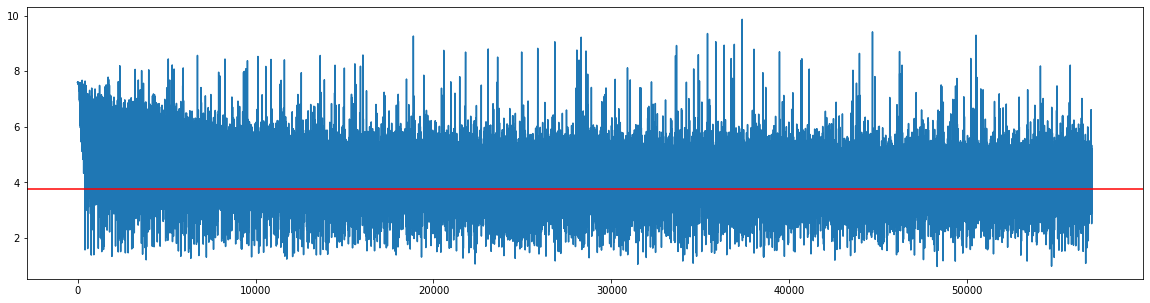

In [8]:
  plt.figure(figsize=(20,5))
  plt.plot(losses)

  # plot a horizontal line for the bigram loss
  avg_bigram_loss = np.mean(bigram_losses)
  print("avg_bigram_loss:", avg_bigram_loss)
  plt.axhline(y=avg_bigram_loss, color='r', linestyle='-')

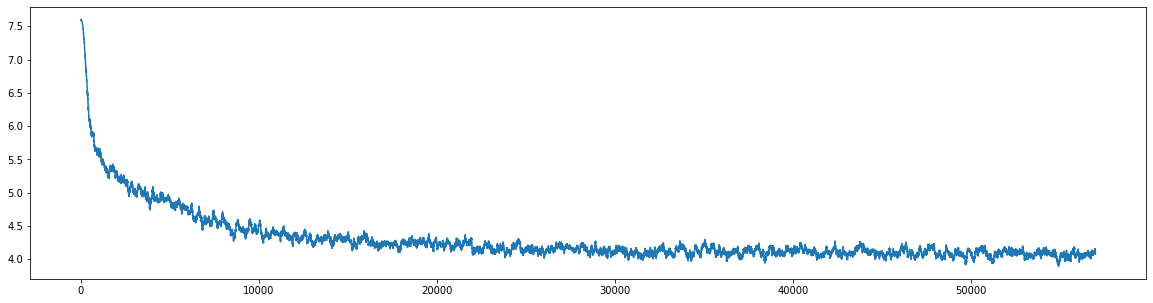

In [9]:
  # plot smoothed losses to reduce variability
  def smoothed_loss(x, decay=0.99):
    y = np.zeros(len(x))
    last = 0
    for t in range(len(x)):
      z = decay * last + (1 - decay) * x[t]
      y[t] = z / (1 - decay ** (t + 1))
      last = z
    return y
  plt.figure(figsize=(20,5))
  plt.plot(smoothed_loss(losses))
  plt.show()

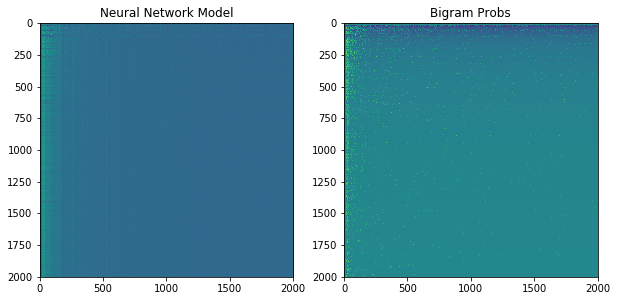

In [11]:
  # plot W and bigram probs side-by-side, for the most common 200 words
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.title("Neural Network Model")
  plt.imshow(np.tanh(W1).dot(W2))
  plt.subplot(1,2,2)
  plt.title("Bigram Probs")
  plt.imshow(W_bigram)
  plt.show()

In [12]:
  print("time elapsed:", datetime.now() - t0)
    
    

time elapsed: 2:49:41.295965
